In [1]:

import tensorflow as tf
from tensorflow import keras

#Importing tensorflow libs
from keras.preprocessing.image import ImageDataGenerator #image generator label data based on the dir the image in contained in
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import get_file, image_dataset_from_directory

#Confusion Matrix Libs
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
import itertools

#Importing general libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pathlib
import os
import random
import shutil

In [2]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(1, 5, figsize=(len(images_arr),len(images_arr)))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% normal")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% pnuemonia")
    plt.show()

In [3]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
train_dir='AIandRealArt/train/'
batch_size = 128
IMG_HEIGHT = 512 
IMG_WIDTH = 512
epochs = 25

In [5]:
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           validation_split=0.3)

train_datagen = train_image_generator.flow_from_directory(
                                                        train_dir,
                                                        target_size= (IMG_HEIGHT,IMG_WIDTH),
                                                        color_mode='rgb',
                                                        batch_size= batch_size,
                                                        class_mode= 'binary',
                                                        classes=['AI_GENERATED','NON_AI_GENRATED'],
                                                        shuffle= True,
                                                        subset='training',
                                                        seed= 42
    )

val_datagen = train_image_generator.flow_from_directory(
                                                        train_dir,
                                                        target_size= (IMG_HEIGHT,IMG_WIDTH),
                                                        color_mode='rgb',
                                                        batch_size= batch_size,
                                                        class_mode= 'binary',
                                                        classes=['AI_GENERATED','NON_AI_GENRATED'],
                                                        shuffle= True,
                                                        subset='validation',
                                                        seed= 42
    )

Found 7231 images belonging to 2 classes.
Found 3099 images belonging to 2 classes.


# 0 - AI Generated 1- Human

[0. 0. 0. 0. 0.]


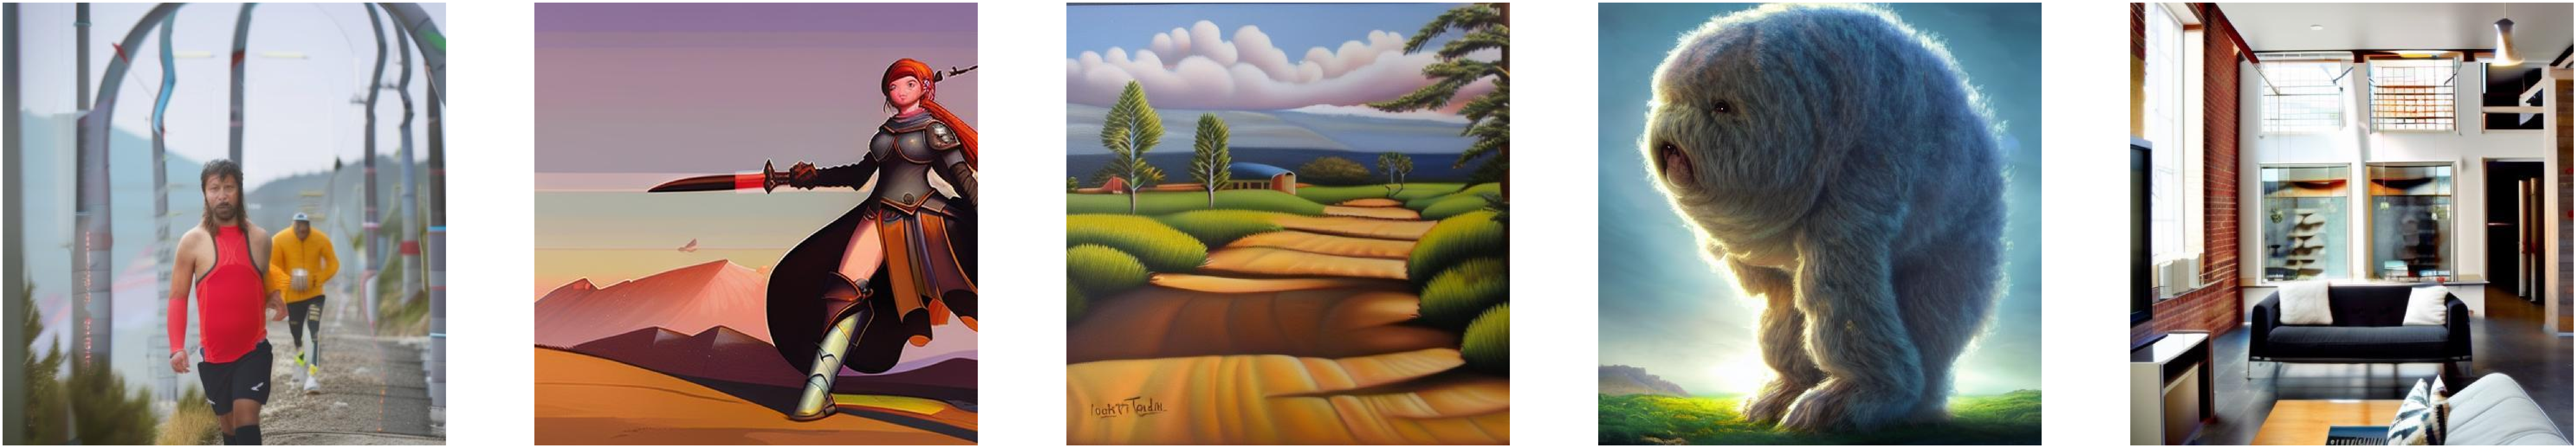

In [6]:
class_names = train_datagen.classes
imgs, class_names = next(train_datagen)
print(class_names[:5])
plotImages(imgs)

In [7]:
train_image_generator = ImageDataGenerator(
    rotation_range= 0.5,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.5,
    validation_split=0.3
)

train_datagen = train_image_generator.flow_from_directory(
    train_dir,
    target_size= (IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    batch_size= batch_size,
    class_mode= 'binary',
    classes=['AI_GENERATED','NON_AI_GENRATED'],
    shuffle= True,
    subset='training',
    seed= 42
    )


Found 7231 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 0.]


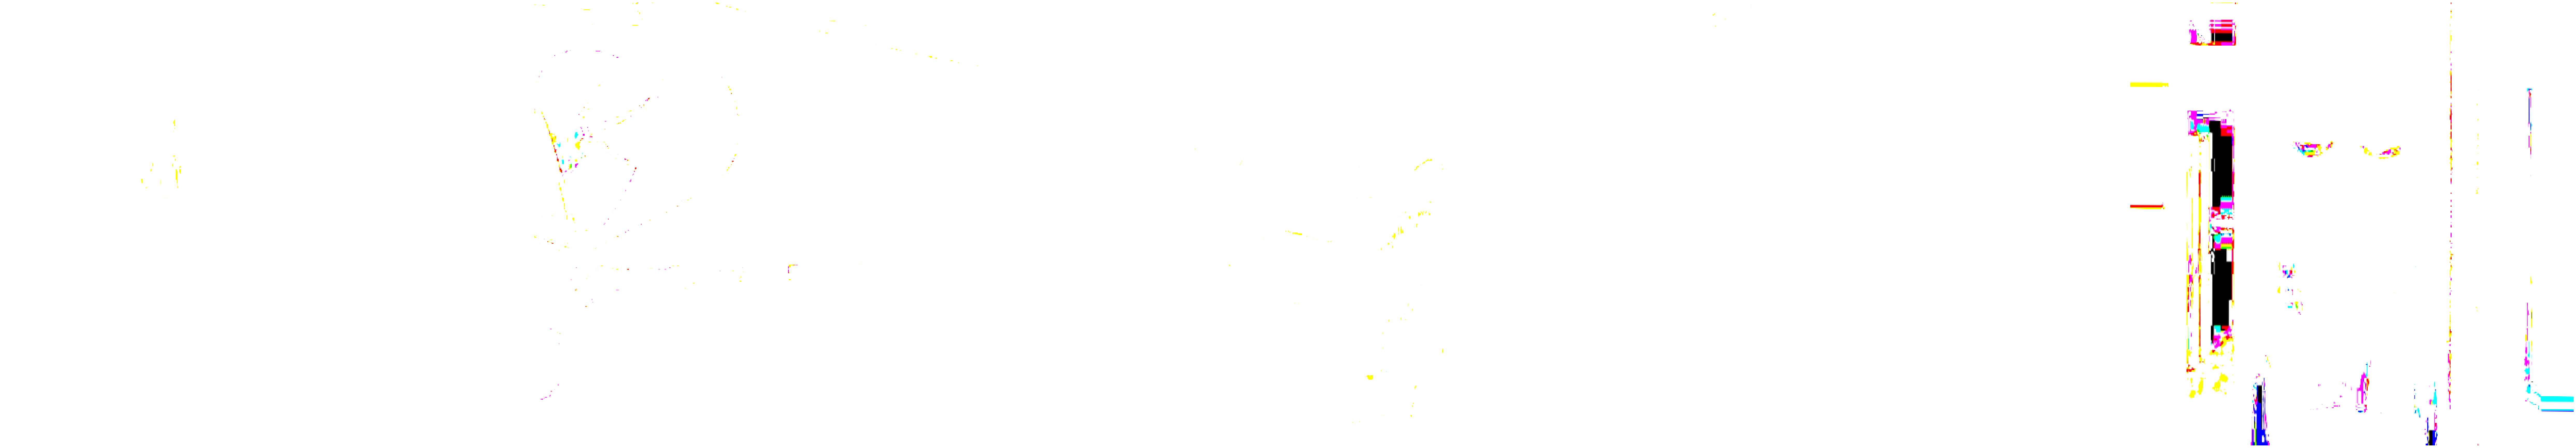

In [8]:
class_names = train_datagen.classes
imgs, class_names = next(train_datagen)
print(class_names[:5])
plotImages(imgs)

In [9]:
model = Sequential([
        Conv2D(filters=32, 
                 kernel_size=3, 
                 strides=1,
                 padding='SAME',
                 activation='relu', 
                 input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)
                 ),
        
        Conv2D(filters=32, 
                 kernel_size=3,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),
        
        Conv2D(filters=64, 
                 kernel_size=5,
                 strides=1, 
                 padding='SAME',
                 activation='relu', 
                 ),
        
        Conv2D(filters=64, 
                 kernel_size=7,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),

        Conv2D(filters=128, 
                 kernel_size=5,
                 strides=1, 
                 padding='SAME',
                 activation='relu', 
                 ),
        
        Conv2D(filters=128, 
                 kernel_size=7,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),

        Flatten(),
        Dropout(0.4),
        Dense(256,activation = 'relu'),
        Dense(2, activation = 'softmax')
])



In [10]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 510, 510, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 255, 255, 64)      51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 249, 249, 64)      200768    
                                                        

In [11]:
history = model.fit(
    train_datagen,
    steps_per_epoch = train_datagen.n//train_datagen.batch_size,
    epochs = epochs,
    validation_data= val_datagen,
    validation_steps= val_datagen.n//val_datagen.batch_size,
)

Epoch 1/25
